# Import libraries

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

# Import dataset

In [27]:
df = pd.read_excel('../Data-gathering/Json/Final_Dataset.xlsx')
df = df.drop(['Index',
           'Date',
           'index',
           'Author name',
           'University',
           'country',
           'Google Scholar link of the university',
           'Google Scholar link of the author',
           'Qs uni world ranking',
           'Qs uni country ranking',
           'Date of the first publication (year)',
           'Date of the last publication (year)',
            ], axis=1)
cols = df.columns
main_df = df

# Minmax scaler

In [29]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(main_df)
min_maxed_df = pd.DataFrame(scaled, columns=[cols])

# Normalization

In [30]:
df_normalized = preprocessing.normalize(min_maxed_df)
dfcopy = df_normalized
df = pd.DataFrame(df_normalized, columns=[cols])

# silhouette_scores with author rank

In [33]:
silhouette_score_list = []
for i in range(2,252):
    KMean= KMeans(n_clusters=i)
    KMean.fit(df)
    label=KMean.predict(df)
    silhouette_score_list.append(silhouette_score(df, label))

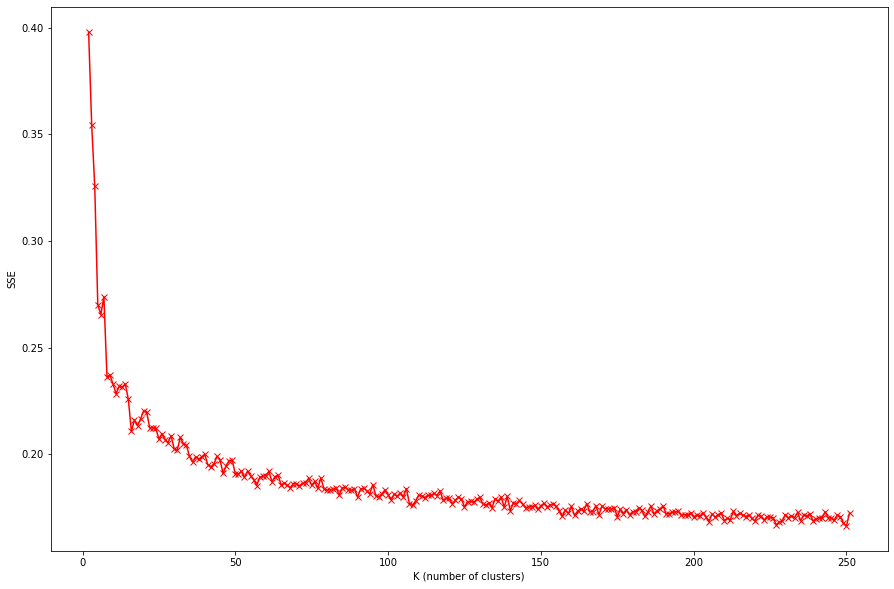

In [35]:
plt.figure(figsize=(15,10))
plt.plot(range(2,252), silhouette_score_list, 'x-', color="red")
plt.ylabel('SSE')
plt.xlabel('K (number of clusters)')
plt.show()

In [45]:
max(silhouette_score_list)

0.3979349905439681

# silhouette_scores without author rank

In [44]:
df = df.drop(["Author's positin in top 100 pages"],axis=1)

c:\Users\Lenovo\Desktop\udemy_co\env\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [22]:
silhouette_score_list = []
for i in range(2,237):
    KMean= KMeans(n_clusters=i)
    KMean.fit(df)
    label=KMean.predict(df)
    silhouette_score_list.append(silhouette_score(df, label))

In [19]:
print(f'Silhouette Score(n=2): {silhouette_score(df, label)}')

Silhouette Score(n=2): 0.18796156608153597


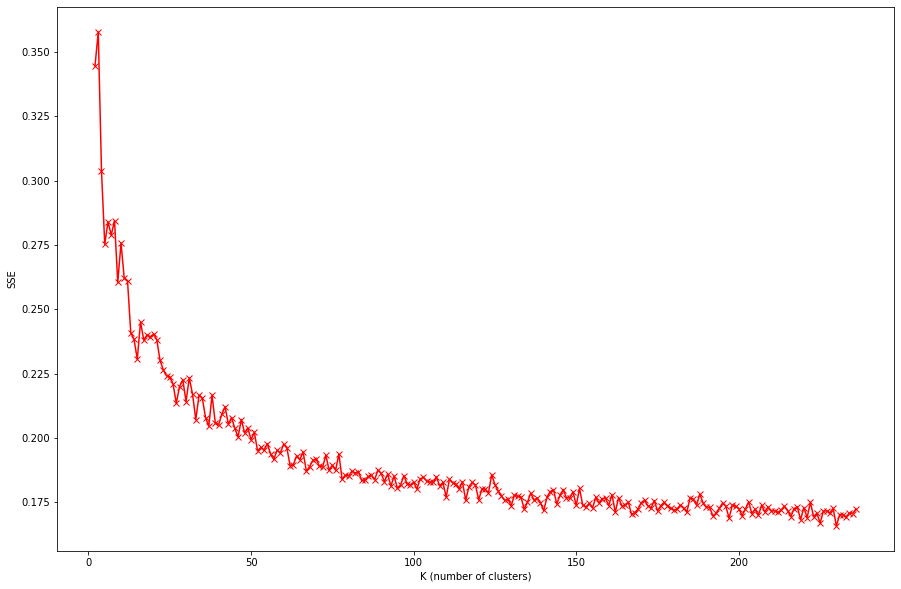

In [23]:
plt.figure(figsize=(15,10))
plt.plot(range(2,237), silhouette_score_list, 'x-', color="red")
plt.ylabel('SSE')
plt.xlabel('K (number of clusters)')
plt.show()

In [24]:
max(silhouette_score_list)

0.35779806559149063